In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import assignment

In [23]:
data = pd.read_csv('Q2_data.csv')
y = data['y'].values
x = data['x'].values

In [24]:
# OLS estimators
ols = assignment.ols_estimator(y, x)

ols_b0 = ols[0]
ols_b1 = ols[1]

print("OLS b0:", ols_b0)
print("OLS b1:", ols_b1)

# Calculate minimum of the OLS
def get_ols_min(x, y, b0, b1):
    x = x.reshape(-1, 1)
    x = np.insert(x, 0, 1, axis=1)
    y = y.reshape(-1, 1)
    b = np.array((b0, b1)).reshape(-1, 1)
    return np.sum(y - np.matmul(x, b))


ols_min = get_ols_min(x, y, ols_b0, ols_b1)
print("Minimum of OLS: ", ols_min)

OLS b0: -2.539160877630002
OLS b1: 3.7286484375308935
Minimum of OLS:  -4.014566457044566e-13


In [25]:
# Fancy gradient descent estimators
inital_guess = np.array([0.0, 0.0])
gradient = assignment.gradient_descent(assignment.sar, assignment.sar_grad, inital_guess, y, x, max_iter=100)
gradient_b0 = gradient[0]
gradient_b1 = gradient[1]
gradient_min = assignment.sar((gradient_b0, gradient_b1), y, x)

print("Gradient b0:", gradient_b0)
print("Gradient b1:", gradient_b1)
print("Minimum LAD for gradient descent algorithm:", gradient_min)

b 1 [0. 0.]
b 2 [-0.01805133  0.87824433]
Gradient b0: -0.018051331161507735
Gradient b1: 0.8782443333423265
Minimum LAD for gradient descent algorithm: 1.6798185304099564


In [26]:
# Nelder-Mead gradient free algorithm
nelmead = assignment.lad_nelder_mead()
nelmead_b0 = nelmead[0]
nelmead_b1 = nelmead[1]
nelmead_min = assignment.sar((nelmead_b0, nelmead_b1), y, x)

print("Nelder-Mead b0:", nelmead_b0)
print("Nelder-Mead b1:", nelmead_b1)
print("Minimum LAD for Nelder-Mead:", nelmead_min)

Nelder-Mead b0: -0.018054156280289183
Nelder-Mead b1: 0.8786335052662293
Minimum LAD for Nelder-Mead: 1.679815849426105


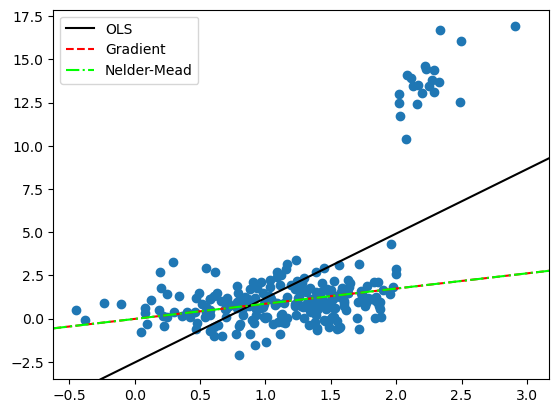

In [27]:
# Plot all 3 lines
plt.scatter(x, y)
plt.axline((0, ols_b0), (3, ols_b0 + 3 * ols_b1), c='black', label="OLS")
plt.axline((0, gradient_b0), (3, gradient_b0 + 3 * gradient_b1), c='red', label="Gradient", linestyle='dashed')
plt.axline((0, nelmead_b0), (3, nelmead_b0 + 3 * nelmead_b1), c='lime', label="Nelder-Mead", linestyle='dashdot')
plt.legend()
plt.show()

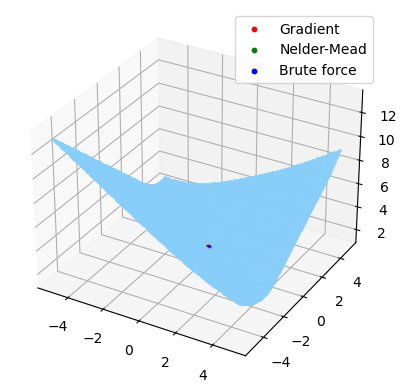

In [28]:
# And now we can try to plot the surface of b0, b1 and the absolute least squares values
def sum_absolute_residuals(b):
    return assignment.sar(b, y, x)

n = 100
B0, B1 = np.meshgrid(np.linspace(-5, 5, n), np.linspace(-5, 5, n))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

minZ = 1000
minB0 = 0
minB1 = 0
Z = np.empty([n, n])
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        b0 = B0[i, j]
        b1 = B1[i, j]
        residuals = sum_absolute_residuals((b0, b1))
        Z[i][j] = residuals
        ax.scatter(b0, b1, residuals, c='lightskyblue', s=1)
        if residuals < minZ:
            minZ = residuals
            minB0 = b0
            minB1 = b1

# point for gradient
ax.scatter(gradient_b0, gradient_b1, gradient_min, c='red', marker='o', s=10, label="Gradient")

# point for Nelder-Mead
ax.scatter(nelmead_b0, nelmead_b1, nelmead_min, c='green', marker='o', s=10, label="Nelder-Mead")

# point for brute force
ax.scatter(minB0, minB1,  assignment.sar((minB0, minB1), y, x), c='blue', marker='o', s=10, label="Brute force")

ax.legend()
plt.show()

In [29]:
# At the same time we used brute force to find minimum of the least absolute deviations
print("Brute force b0:", minB0)
print("Brute force b1:", minB1)
print("Minimum LAD for brute force", assignment.sar((minB0, minB1), y, x))

Brute force b0: 0.050505050505050164
Brute force b1: 0.8585858585858581
Minimum LAD for brute force 1.6805905855077021


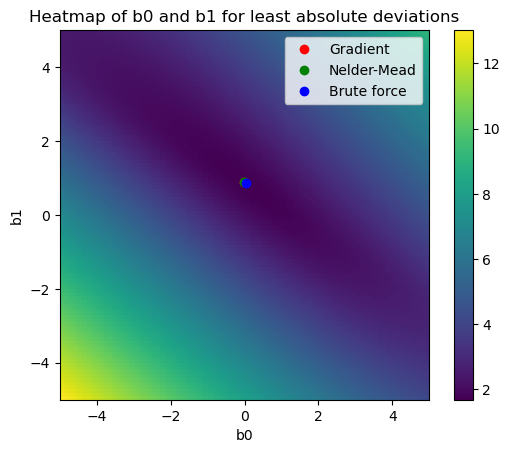

In [30]:
plt.imshow(Z, extent=[-5, 5, -5, 5], origin='lower')
plt.colorbar()
plt.xlabel('b0')
plt.ylabel('b1')
plt.title('Heatmap of b0 and b1 for least absolute deviations')
plt.plot(gradient_b0, gradient_b1, 'ro', label="Gradient")
plt.plot(nelmead_b0, nelmead_b1, 'go', label="Nelder-Mead")
plt.plot(minB0, minB1, 'bo', label="Brute force")
plt.legend()
plt.show()